# 3. 神經網路 (neuron network)

 從資料當中，自動學習適當的權重參數，是神經網路重要的性質。

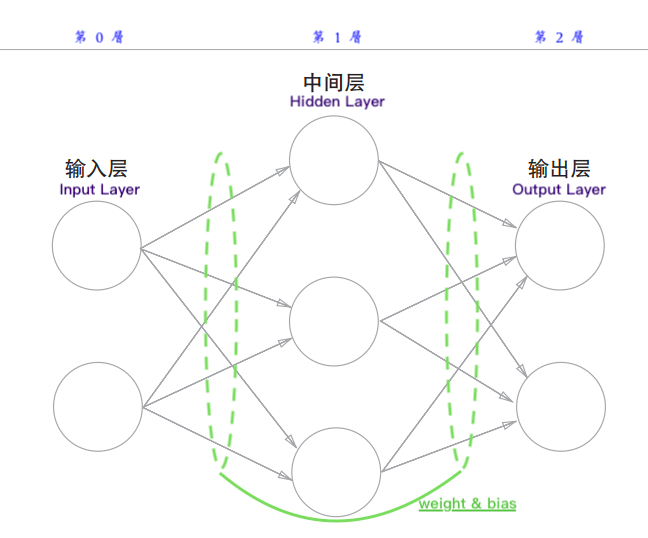

In [1]:
%matplotlib inline
from PIL import Image
Image.open("./textbook_pic/3-1.png")


---
$$y = \left\{\begin{matrix}
0, (b+w_1x_1 + w_2x_2) \leq 0
\\ 
1, (b+w_1x_1 + w_2x_2) >  0
\end{matrix}\right.$$

 - $x_1$ and $x_2$ are input neuron
 - $w_1$ and $w_2$ are $weight$.
 - $y$ is output neuoun.
 - **$b$ is bias**. 
    - 控制發火程度
 -  ◯ : neuron or node.
 

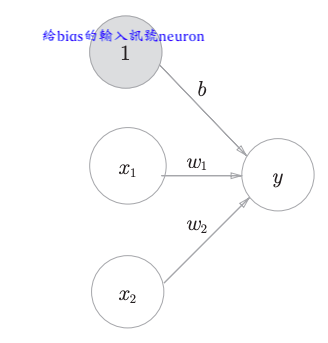

In [2]:
%matplotlib inline
from PIL import Image
Image.open("./textbook_pic/3-3.png")

We want to transfer to simple formula.

So, let 
$$ x = b+w_1x_1 + w_2x_2 $$

given a function: $h(x)$, where is a 活化函數( $activation$ $function$ )

Then, we get

$$y = \left\{\begin{matrix}
0, h(x) \leq 0
\\ 
1, h(x) >  0
\end{matrix}\right.$$

## 3.1.3 活化函數 (activation function)
 - $h(x)$ 將輸入的訊號總和 轉換 輸出訊號的 函數
 
Let 
$$ a = b+w_1x_1 + w_2x_2 $$

we get
$$y = h(a)$$

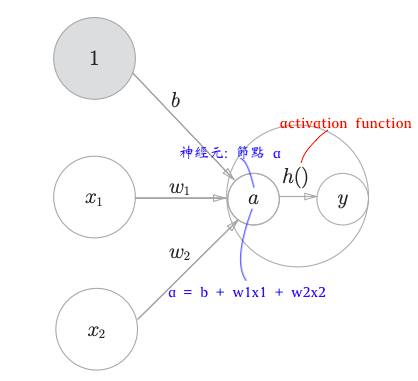

In [3]:
%matplotlib inline
from PIL import Image
Image.open("./textbook_pic/3-4.png")

 - 在神經元 ◯ 之中，表線了活化函數的流程

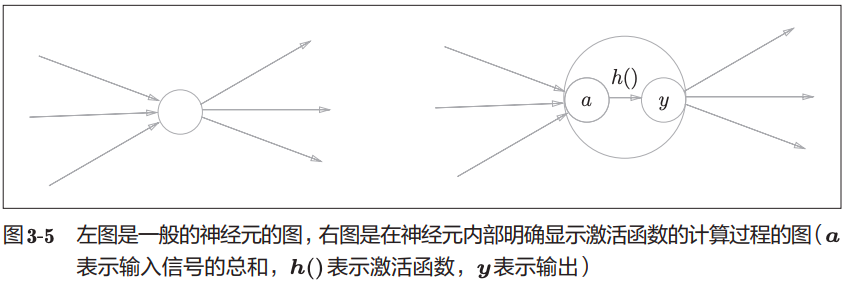

In [4]:
%matplotlib inline
from PIL import Image
Image.open("./textbook_pic/3-5.png")

### 3.2 活化函數的種類

#### 階梯函數 (step function)

$$y = \left\{\begin{matrix}
0, x \leq 0
\\ 
1, x >  0
\end{matrix}\right.$$

In [5]:
import numpy as np
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

#### 以上看起來很容易理解，但在 Numpy 的 陣列當中無法使用

In [6]:
print("可以執行 step_function(3.0): {0}".format(step_function(3.0)))
print("-" * 60)
print("不能執行 step_function(np.array([3.0,2.0])): {0}".format(step_function(np.array([3.0,2.0]))))

可以執行 step_function(3.0): 1
------------------------------------------------------------


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

#### 因此在程式上要稍作修改

In [7]:
# for example
x = np.array([1.0, -1.0, 2.0])
x

array([ 1., -1.,  2.])

In [8]:
y = x > 0
y

array([ True, False,  True])

In [9]:
y.astype(np.int)

array([1, 0, 1])

In [10]:
import numpy as np
def step_function(x):
    y = x > 0 # this bool type
    return y.astype(np.int) # bool type transfer to 0&1

#  True: 1
# False: 0


'''or'''

def step_function(x):
    return np.array(x > 0, dtype = np.int)

In [11]:
step_function(x)

array([1, 0, 1])

#### plot of step function

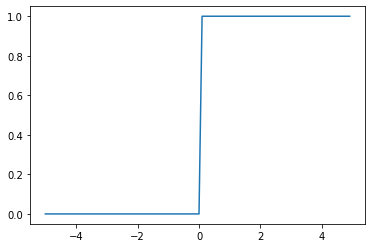

In [12]:
# generating the number for [-5.0, 5.0) by 0.1 
import matplotlib.pyplot as plt
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x, y)

### Sigmoid function

$$h(x)=\frac{1}{1+exp(-x)}$$

In [13]:
def sigmoid_function(x):
    y = 1/(1 + np.exp(-x))
    return y

#### plot of sigmoid function

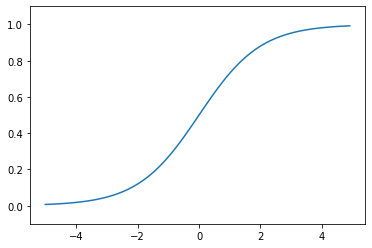

In [14]:
# generating the number for [-1.0, 1.0) by 0.1 
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid_function(x)
plt.ylim(-0.1,1.1) # setting y-axis range
plt.plot(x,y)

### Comparable the step function & sigmoid function

Text(0.5, 1.0, 'Comparable the step function & sigmoid function')

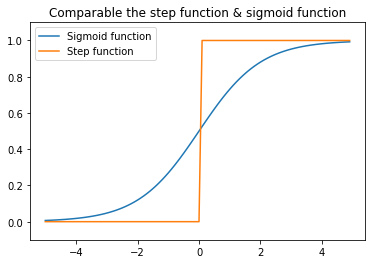

In [15]:
# generating the number for [-1.0, 1.0) by 0.1 
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid_function(x)
y2 = step_function(x)
plt.ylim(-0.1,1.1) # setting y-axis range
plt.plot(x,y1, label = 'Sigmoid function')
plt.plot(x,y2, label = 'Step function')
plt.legend()
plt.title("Comparable the step function & sigmoid function")

 
 ### we can find that
 
 - 1. sigmoid is smooth and continuous. 
     - at neuron network is transferred continous signal.
 - 2. step function is separated by 0.
 
 ---
 
 ### sigmoid & step function with common property:
 
 - 1. sigmoid and step funcion are non-linear function.
 - 2. the outpur shape are similar.
 - 3. if input signal is important, then out signal are larger value.
 - 4. output range are [0, 1]

#### 在神經網路當中的 activation funciton 必須為 non-linear funciton

### Why not use linear function to become activation function?
 - 因為如果使用線性函數，增加神經網路的層數(layer)將會變得無意義。

Let
$$h(x) = c*x$$ 

,where $h(x)$ is a activation function.

$$h(h(h(x)))= c^3 = c^*x$$

 - 多加幾層後，其結果仍為一個線性函數，無法發揮多層結構的優點。
 
 ---

### ReLU 函數 (Rectified Linear Unit)
 - 如果輸入超過 0，就將輸入直接輸出，如果是 0 以下，就輸出 0 的函數。
 
 
$$h(x) = \left\{\begin{matrix}
0, x \leq 0
\\ 
x, x >  0
\end{matrix}\right.$$

In [16]:
def ReLU_function(x):
    y = np.maximum(x,0) # maximum 是從輸入值當中取出較大的值當輸出值
    return y

Text(0.5, 1.0, 'Plot of ReLU function')

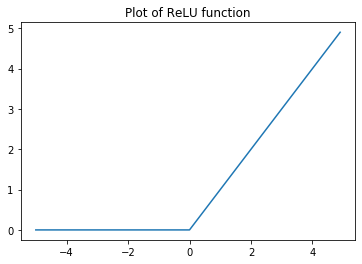

In [17]:
# generating the number for [-1.0, 1.0) by 0.1 
x = np.arange(-5.0, 5.0, 0.1)
y = ReLU_function(x)
plt.plot(x,y, label = 'ReLU function')
plt.title("Plot of ReLU function")

### 3.3.3 神經網路的矩陣運算

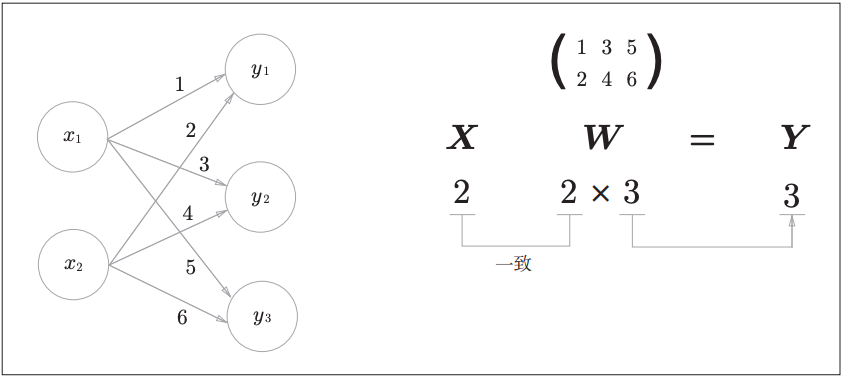

In [18]:
%matplotlib inline
from PIL import Image
Image.open("./textbook_pic/3-14.png")

In [19]:
X = np.array([1,2]) 
print("X: {0}".format(X))
print("X.shape: {0}".format(X.shape))

X: [1 2]
X.shape: (2,)


In [20]:
W = np.array([[1,3,5],[2,4,6]])
print("W: {0}".format(W))
print("W.shape: {0}".format(W.shape))

W: [[1 3 5]
 [2 4 6]]
W.shape: (2, 3)


In [21]:
Y = np.dot(X, W)
print("Y: {0}".format(Y))
print("Y.shape: {0}".format(Y.shape))

Y: [ 5 11 17]
Y.shape: (3,)


#### 矩陣運算的好處就是速度快，比 for loop 還快

## 3.4 三層神經網路

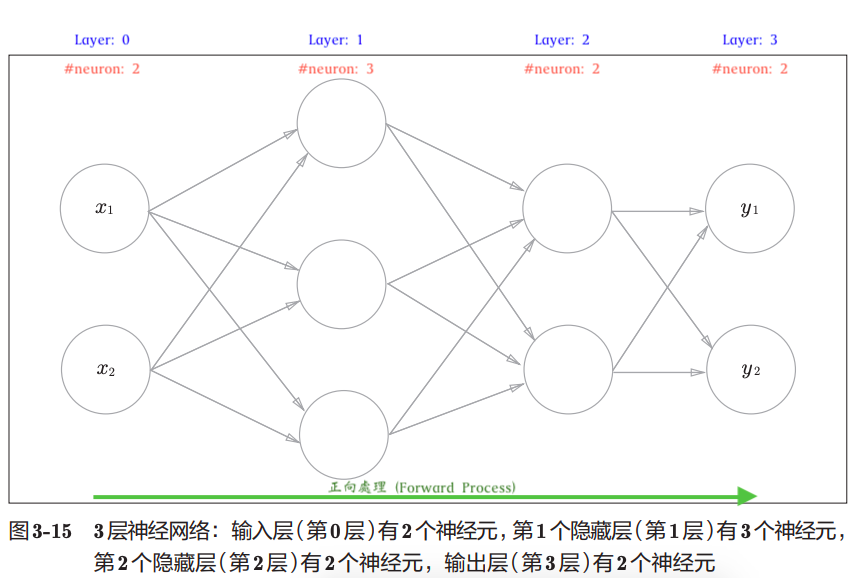

In [22]:
%matplotlib inline
from PIL import Image
Image.open("./textbook_pic/3-15.png")

#### 符號定義

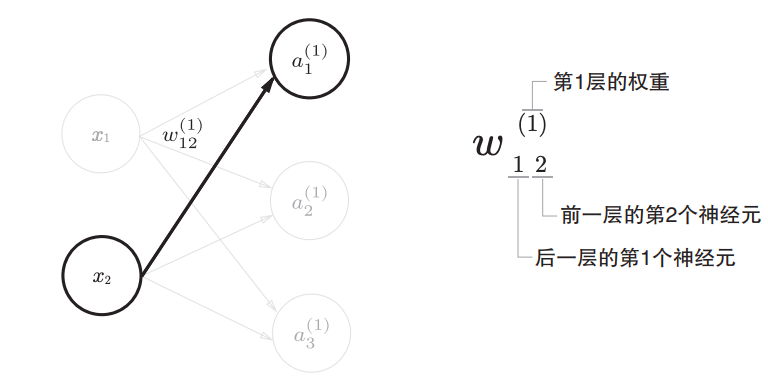

In [23]:
%matplotlib inline
from PIL import Image
Image.open("./textbook_pic/3-16.png")

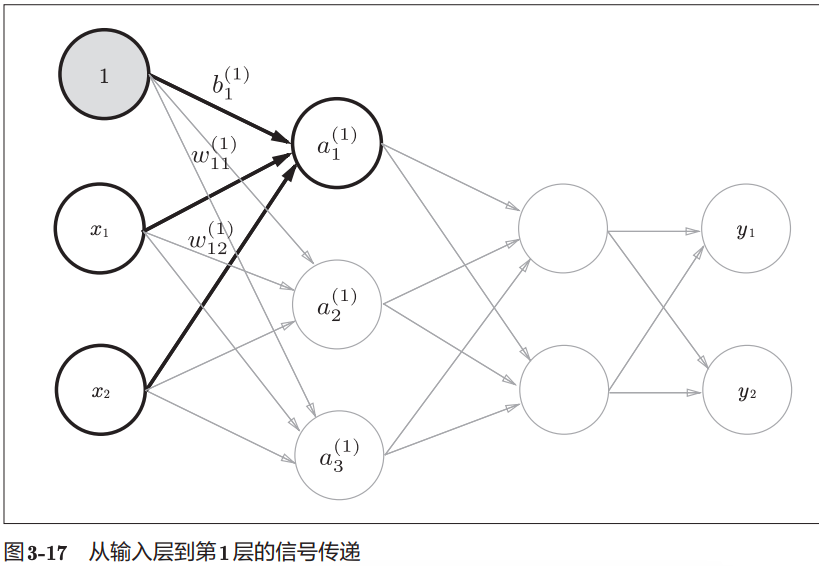

In [24]:
%matplotlib inline
from PIL import Image
Image.open("./textbook_pic/3-17.png")

#### 可注意到 Bias ① 只有一個神經元，所以 $b_1^{(1)}$ 只會底標有一個

$a_1^{(1)}$ 是含 weight & bias 之和

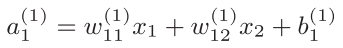

In [25]:
%matplotlib inline
from PIL import Image
Image.open("./textbook_pic/3-8-f.png")

#### 用矩陣來計算第一層的加權總和


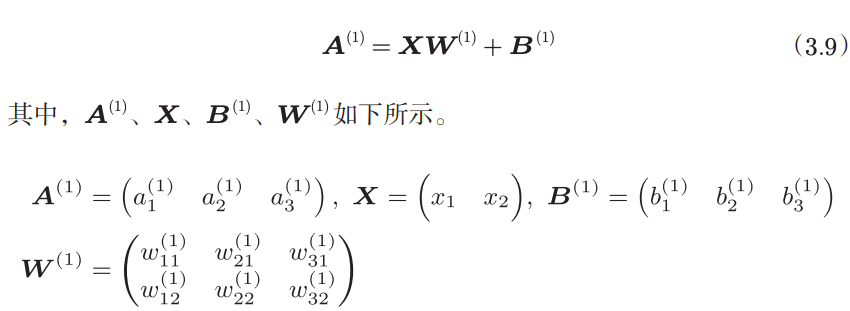

In [26]:
%matplotlib inline
from PIL import Image
Image.open("./textbook_pic/3-9-f.png")

In [27]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print("X.shape:{0}".format(X.shape))
print("B1.shape:{0}".format(B1.shape))
print("W1.shape:{0}".format(W1.shape))

X.shape:(2,)
B1.shape:(3,)
W1.shape:(2, 3)


In [28]:
A1 = np.dot(X, W1) + B1
print("A1:{0}".format(A1))
print("A1.shape:{0}".format(A1.shape))

A1:[0.3 0.7 1.1]
A1.shape:(3,)


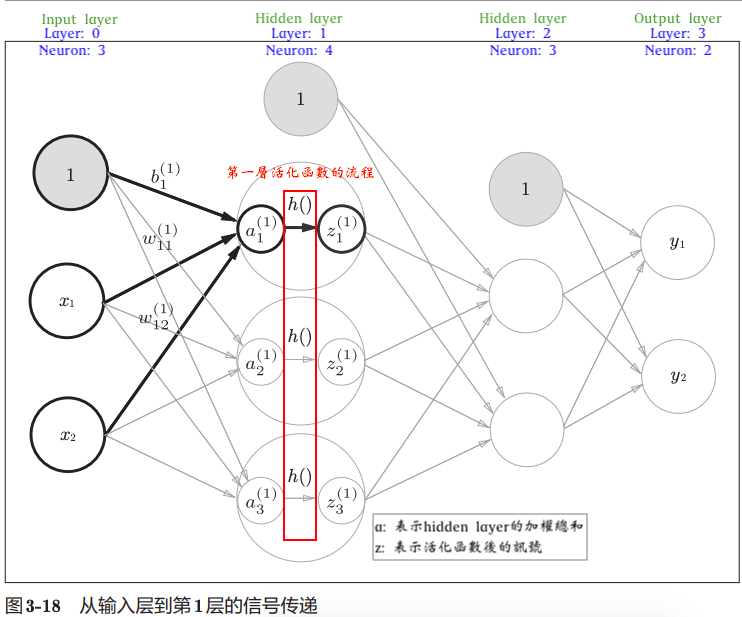

In [29]:
%matplotlib inline
from PIL import Image
Image.open("./textbook_pic/3-18.png")

In [30]:
Z1 = sigmoid_function(A1)

print("A1:{0}".format(A1))
print("Z1:{0}".format(Z1))

A1:[0.3 0.7 1.1]
Z1:[0.57444252 0.66818777 0.75026011]


In [31]:
W2 = np.array([[0.1, 0.4],[0.2, 0.5],[0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print("Z1.shape:{0}".format(Z1.shape))
print("W2.shape:{0}".format(W2.shape))
print("B2.shape:{0}".format(B2.shape))


Z1.shape:(3,)
W2.shape:(3, 2)
B2.shape:(2,)


In [32]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid_function(A2)

print("A2:{0}".format(A2))
print("Z2:{0}".format(Z2))

A2:[0.51615984 1.21402696]
Z2:[0.62624937 0.7710107 ]


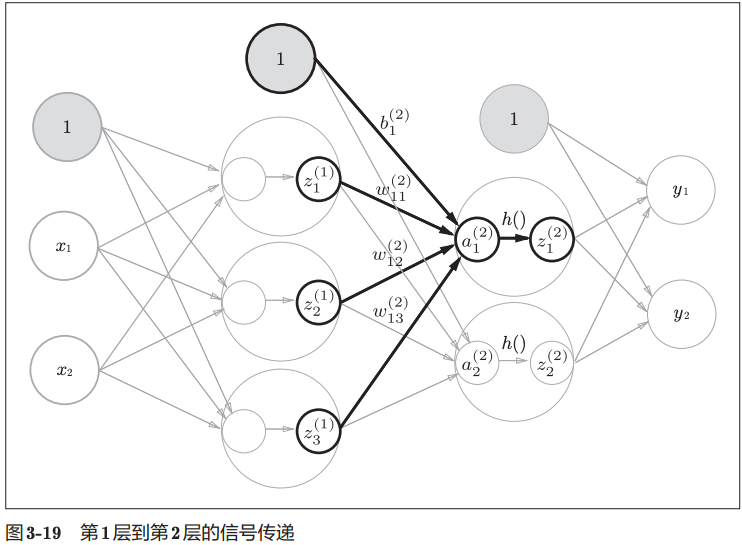

In [33]:
%matplotlib inline
from PIL import Image
Image.open("./textbook_pic/3-19.png")

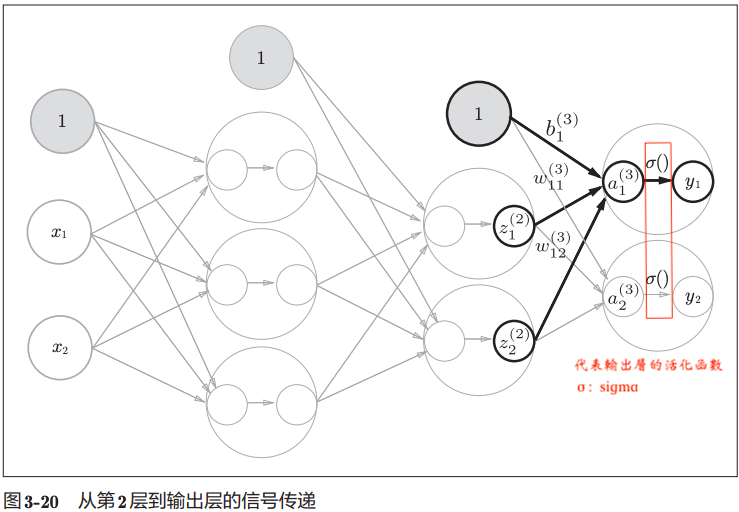

In [34]:
%matplotlib inline
from PIL import Image
Image.open("./textbook_pic/3-20.png")

#### "2nd Layer" transfer to "Output Layer"與剛剛執行的結果是相同的。
#### 定義 “恆等函數” (identity function)
 - 直接把輸入值直接當輸出值的函數。
 - 另外 $\sigma()$ 代表 output layer 的 activation function，要與 hidden layer 的 $h()$ 做區別。

In [35]:
def identity_function(x):
    return(x)

In [36]:
W3 = np.array([[0.1, 0.3],[0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3

Y = identity_function(A3) # or Y = A3

print("A3:{0}".format(A3))
print("Y:{0}".format(Y))

A3:[0.31682708 0.69627909]
Y:[0.31682708 0.69627909]


## 3.4.3 統一執行處理
 - 符號統一：
     - weight: 大寫, 其他: 小寫 


In [37]:
import numpy as np

'''initial parameter of weight and bias'''
def init_network():
    network = {}  # open a null dictionary
    network['W1'] = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

'''the process of neuron work'''
'''forword: from input layer to output layer process'''
def forword(network, x): 
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    # input layer -> 1st layer
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid_function(a1)

    # 1st layer -> 2nd layer
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid_function(a2)
    
    # 2nd layer -> 3rd layer
    a3 = np.dot(z2, W3) + b3
    
    # 3rd layer 
    y = identity_function(a3)  # in fact, y = a3
    
    return y

In [38]:
network = init_network() # Set the initial parameters (weight and bias)
x = np.array([1.0, 0.5]) # input layer
y = forword(network, x)

print(y)

[0.31682708 0.69627909]


## 3.5 Design the Output Layer
 - 1. Category Problem
     - using **softmax function**
 - 2. Regression Problem
     - using **identity function**

### 3.5.1 Softmax function & Identity function

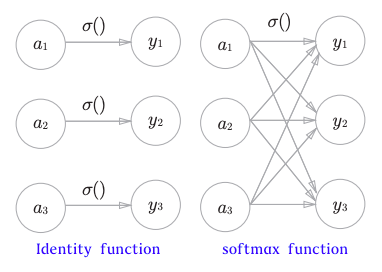

In [39]:
%matplotlib inline
from PIL import Image
Image.open("./textbook_pic/3-21.png")

#### Softmax function

$$y_k=\frac{exp(a_k)}{\sum_{i=1}^{k}exp(a_i)}$$

 - output layer with $n^{th}$ neuro.
 
 
 - The $k^{th}$ neuron is output $y_k$

In [40]:
### for example
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print("exp_a: {0}".format(exp_a))

exp_a: [ 1.34985881 18.17414537 54.59815003]


In [41]:
sum_exp_a = np.sum(exp_a)
print("sum_exp_a: {0}".format(sum_exp_a))

sum_exp_a: 74.1221542101633


In [42]:
y = exp_a / sum_exp_a
print("y: {0}".format(y))

y: [0.01821127 0.24519181 0.73659691]


In [43]:
def softmax_function(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

#### 執行 softmax 的注意事項 - 電腦運算產生溢位的問題
 - 在數值很大時，如 exp(1000) 的結果回傳回來代表無限大的 Inf
 - nan: not a number (不定數)
 - 修正 softmax 公式

In [44]:
# For example
a = np.array([1010, 1000, 990])
exp_a = np.exp(a)
sum_exp_a = np.sum(exp_a)
exp_a / sum_exp_a

/Users/chibaryowei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chibaryowei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


array([nan, nan, nan])

### 修正 softmax 公式

$$y_k  = \frac{exp(a_k)}{\sum_{i=1}^{k}exp(a_i)}
     = \frac{C exp(a_k)}{C \sum_{i=1}^{k}exp(a_i)}
     = \frac{exp(log(C)) exp(a_k)}{exp(log(C)) \sum_{i=1}^{k}exp(a_i)}
     = \frac{exp(a_k + log(C))}{\sum_{i=1}^{k}exp(a_i+log(C))} 
     = \frac{exp(a_k + C^{'})}{\sum_{i=1}^{k}exp(a_i+ C^{'})} $$
     
     
 - 1. 分子與分母同時乘以 $C$
 - 2. $C = exp(log(C))$
 - 3. 根據 exponential 的特性把他代進去
 - 4. $C^{'} = log(C)$，得到一個常數 (constant)
 - 5. 其 $C^{'}$ 並不會影響 softmax 原有的公式，但可以防止溢位

In [45]:
a = np.array([1010, 1000, 990])
c = np.max(a) # 為了防止溢位，通常取輸入值的最大值。

a-c

array([  0, -10, -20])

In [46]:
np.exp(a-c) / np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [47]:
### Redesign the Softmax function
def softmax_function(a):
    c = np.max(a)     # 取最大值
    exp_a = np.exp(a-c) # 防止溢位
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

### 3.5.3 softmax 的特色
 - 1. output belongs to 0 ~ 1 real number. Just like **Probability**.
 - 2. sum of output is 1.
 - 3. 以下面的例子為例：
     - 第 0 類別的機率為 1.8%
     - 第 1 類別的機率為 25%
     - 第 2 類別的機率為 75%
     
 - 4. 由於 softmax 是單調遞增函數 (monotone increasingly function) 
     - $y = exp(x)$ 
     - 因此，只要 input 大，outpit 也會跟著大。
---

```
In general, 神經網路的類別會把輸出最大的神經元的類別當作（識別結果），即使套用 softmax ，輸出最大神經元的位置不變。
So, 神經網路進行分類時，可以省略輸出層的 softmax 函數。
```

In [48]:
a = np.array([0.3, 2.9, 4.0])
y = softmax_function(a)
print("y: {0}".format(y))
print("np.sum(y): {0}".format(np.sum(y)))

y: [0.01821127 0.24519181 0.73659691]
np.sum(y): 1.0


 - 1. 一開始利用學習階段來學習模型，
 - 2. 在推論階段使用學習過的模型，對未知的資料進行推論（分類）。
 - 3. 推論過程中，一般會將 output layer's softmax function 省略掉。


### 3.5.2 輸出層的神經元數量
 - 輸出層的神經元必須根據**想要解決的問題而定**
 - e.g., 影像數字 0 ~ 9

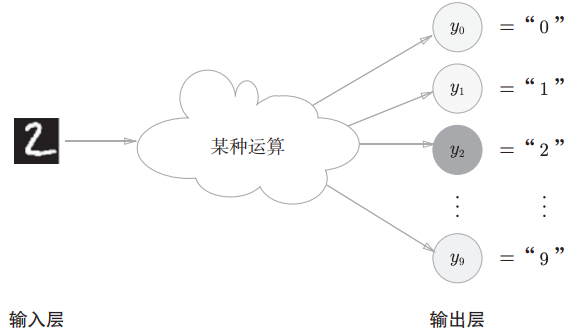

In [49]:
%matplotlib inline
from PIL import Image
Image.open("./textbook_pic/3-23.png")

## 3.6 手寫辨識
 - 假設使用完成學習的參數，執行神經網路的「推論處理」，在此又稱做神經網路的「正向傳播 (forward boardcast)」

---
 
 ### 解決機器學習的步驟
 - 1. 學習
     - 使用訓練資料（學習資料），進行權重的參數學習。
 - 2. 推論
     - 使用學習過後的參數，將輸入的資料進行分類。     
---
     
### 3.6.1 MNIST 資料集

 - 由 0 ~ 9 的影像數字所構成
 - 這裡提供 60,000 張的訓練資料 (training data) 
 - 這裡提供 10,000 張的測試資料 (testing data)
 - MNIST 是 28*28 的灰階資料（單色版），像素為 0~255 的數值
 

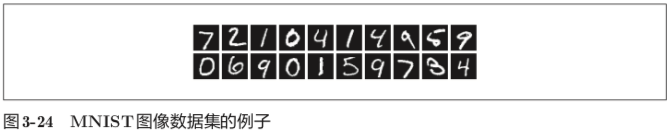

In [50]:
%matplotlib inline
from PIL import Image
Image.open("./textbook_pic/3-24.png")

In [51]:
# Loading the library
import numpy as np
import sys, os

path_dir = './dataset/'
#sys.path.append(os.pardir) # 載入父目錄檔案的設定
sys.path.append(path_dir)  # 載入父目錄檔案的設定
from dataset.mnist import load_mnint


ModuleNotFoundError: No module named 'dataset.mnist'

In [ ]:
'''
flatten: 1x28x28 -> 變成一維的 array: 1x784
normalize: 影像正規化 0~255 -> 0~1
one_hot_label: (True)設定是否儲存正確答案為 Label = 1, 其餘為 0 的 array
               (False)就是儲存原來的樣貌，如數字 7, 2 這種單純的數字
'''

(x_train, t_test), (x_test, t_test) = load_mnist(flatten = True, normalize = False, one_hot_label = False)


In [52]:
print("x_train.shape: {0}".format(x_train.shape))
print("t_train.shape: {0}".format(t_train.shape))
print("x_test.shape: {0}".format(x_test.shape))
print("t_test.shape: {0}".format(t_test.shape))

NameError: name 'x_train' is not defined

In [53]:
import sys, os
#sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnint
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0] #改變序號可以讀取不同的圖片
label = t_train[0] #改變序號可以讀取不同的圖片
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 把圖像的形狀變爲原來的尺寸
print(img.shape)  # (28, 28)

img_show(img)

ModuleNotFoundError: No module named 'dataset.mnist'

In [54]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data(): # loading the dataset from mnint
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, # pixel range is 0~1
                                                      flatten=True, # 1*28*28 -> 1*784
                                                      one_hot_label=False) # we just get real number
    return x_test, t_test # only need to testing data


def init_network(): # already learned weight & bias , save to dictionary type
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x): # procesure of neuron network
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y



ModuleNotFoundError: No module named 'dataset.mnist'

In [55]:
'''一張一張處理照片'''

x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)): # len(x) is how many pic 
    y = predict(network, x[i]) # x[i]  is 784 1-dim array
    p= np.argmax(y) # 取得機率最高的元素當索引值 (index 剛好從0開始，與python同)
    if p == t[i]: # 如果 predict == target 則 計數器 + 1
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

NameError: name 'get_data' is not defined

### 3.6.3 批次處理

 - batch 有著統一性質的輸入資料，有一束的意思，束在一起。
 - 透過 batch process, 可以大幅縮短每張影像的處理時間，有效率的進行大型陣列的運算，減少匯流排頻寬的負擔。

In [56]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print("x.shape: {0}",format(x.shape))
print("W1.shape: {0}",format(W1.shape))
print("W2.shape: {0}",format(W2.shape))
print("W3.shape: {0}",format(W3.shape))


NameError: name 'get_data' is not defined

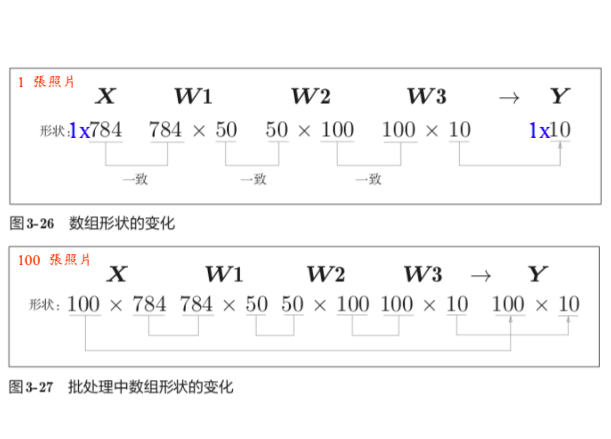

In [57]:
%matplotlib inline
from PIL import Image
Image.open("./textbook_pic/3-26.png")

In [58]:
'''每 100 張處理一次照片'''

x, t = get_data()
network = init_network()

batch_size = 100 # 一次處理的數量
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

NameError: name 'get_data' is not defined

In [59]:
'''Introduce range'''
print("-"*10 + "range case for batch size" + "-"*10)
print("list(range(0, 10)): {0}".format(list(range(0, 10))))
print("list(range(0, 10, 3)): {0}".format(list(range(0, 10, 3))))

print("\t")

'''Introduce argmax'''
x = np.array([[0.1, 0.8, 0.1],
              [0.3, 0.1, 0.6],
              [0.2, 0.5, 0.3],
              [0.8, 0.1, 0.1]])
print(x)
print("")
print("for row: np.argmax(x, axis = 1): {0}".format(np.argmax(x, axis = 1)))
print("for col: np.argmax(x, axis = 0): {0}".format(np.argmax(x, axis = 0)))

           
print("\t")   
              
'''Introduce F/T/sum'''
x = np.array([1,2,1,0])
t = np.array([1,2,0,0])
print("x == t => {0}".format(x == 
                             t))
print("sum(x == t) => {0}".format(sum(x == t)))

----------range case for batch size----------
list(range(0, 10)): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
list(range(0, 10, 3)): [0, 3, 6, 9]
	
[[0.1 0.8 0.1]
 [0.3 0.1 0.6]
 [0.2 0.5 0.3]
 [0.8 0.1 0.1]]

for row: np.argmax(x, axis = 1): [1 2 1 0]
for col: np.argmax(x, axis = 0): [3 0 1]
	
x == t => [ True  True False  True]
sum(x == t) => 3


# Summary

### 感知器 & 神經網路相似之處:
 - 正向傳播 (forward boardcast)


#### 感知器 ($perceprton$):
 - step function
    

#### 神經網路 ($neuron network$):
 - Hidden Layer: 
     - sigmoid, ReLU function
 - Output Layer:
     - Regression: identity funciton
     - Category: Softmax function
     
